# Floyd-Warshall algorithm

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Import needed libraries

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from tqdm import tqdm
import math

#### Graph generation function

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G

# Floyd-Warshall Algorithm

#### Task: write a function that will implement Floyd-Warshall's algorithm taking as an argument a graph generated using the module provided in the task (function gnp_random_connected_graph). Then compare developed algorithm with the native one from networkx

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [14]:
G_floyd = gnp_random_connected_graph(7, 0.001, False, False)
G_floyd.edges(data=True)

EdgeDataView([(0, 4, {'weight': 11}), (1, 3, {'weight': 11}), (2, 5, {'weight': 5}), (3, 6, {'weight': 17}), (4, 5, {'weight': 11}), (5, 6, {'weight': 5})])

In [5]:
def create_table_for_floyd(graph, is_graph_directed):
    """
    Function that creates table for
    floyd algorithm using generated
    graph
    """
    N = len(graph.nodes)
    table = [[math.inf for _ in range(N)] for _ in range(N)]
    for x, y, w_dict in list(graph.edges(data=True)):
        table[x][x] = 0
        table[y][y] = 0
        if is_graph_directed:
            table[x][y] = w_dict['weight']
        else:
            table[x][y] = w_dict['weight']
            table[y][x] = w_dict['weight']
    return table

def floydworshal_algorithm(graph, is_graph_directed, table = None):
    """
    Floyd-Warshall algorithm implementation

    Args:
        graph: format from generation function - graph
        nodes: int - the sum of nodes
        is_graph_directred: bool - is graph directed?
    Returns:
    """
    if table == None:
        table = create_table_for_floyd(graph, is_graph_directed)
    N = len(graph.nodes)
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = table[i][k] + table[k][j]
                if i == j and d < 0:
                    return "Negative cycle detected!"
                if table[i][j] > d:
                    table[i][j] = d
    return table

#### Here you can see an example of using created Floyd-Warshall algorithm. Function returns List[List[int]] (matrix). Firstly function create_table_for_floyd() creates the table for algorithm using generated graph and then function floydworshall_algorithm() implements algorithm

In [15]:
floydworshal_algorithm(G_floyd, False)

[[0, 55, 27, 44, 11, 22, 27],
 [55, 0, 38, 11, 44, 33, 28],
 [27, 38, 0, 27, 16, 5, 10],
 [44, 11, 27, 0, 33, 22, 17],
 [11, 44, 16, 33, 0, 11, 16],
 [22, 33, 5, 22, 11, 0, 5],
 [27, 28, 10, 17, 16, 5, 0]]

## FLoyd-Warshall algrorithm time measuring

In [16]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance
nodes_for_floyd = [10, 20, 50]
NUM_OF_ITERATIONS = 1000

In [20]:
time_taken_imported = 0
floyd_native_algorithm = []
#For imported kruskal algorithm for 10, 20, 50 nodes graph
for node in nodes_for_floyd:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        graph_for_imported = gnp_random_connected_graph(node, 0.01, False)

        #measure time while algorithm is working
        start = time.time() #start
        try:
            pred, dist = floyd_warshall_predecessor_and_distance(graph_for_imported) #algorithm is working
        except:
            pass
        end = time.time() #end
        time_taken_imported += end - start
    floyd_native_algorithm.append(time_taken_imported)
    time_taken_imported / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:37<00:00, 26.93it/s]


In [18]:
time_taken_created = 0
floyd_own_algorithm = []
#For created floyd algorithm for 10, 20, 50 nodes graph
for node in nodes_for_floyd:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        geaph_for_created = gnp_random_connected_graph(node, 0.01, False)

        #measure time while algorithm is working
        start = time.time() #start
        floydworshal_algorithm(graph_for_imported, True)
        end = time.time() #end
        time_taken_created += end - start
    floyd_own_algorithm.append(time_taken_created)
    time_taken_created / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:41<00:00, 23.90it/s]


#### Here you can see comparing native and created algorithms and a graph that shows diference in time

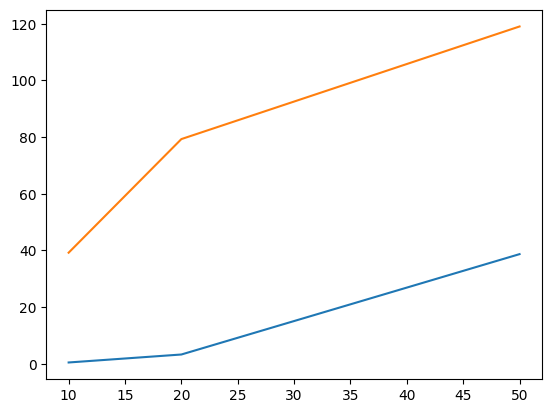

In [21]:
plt.plot(nodes_for_floyd, floyd_native_algorithm)
plt.plot(nodes_for_floyd, floyd_own_algorithm)
plt.show()

#### As you can see, our algorithm is always much slower than native one. This is because the native algorithm is written with better time complexity (probably other data structures)